<a href="https://colab.research.google.com/github/Kedar154/AI-Driven-Stock-Market-Intelligence/blob/main/stock_pred_ARIMA(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Kedar H
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis


100%|██████████| 26.7k/26.7k [00:00<00:00, 47.3MB/s]

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import signal
from scipy.stats import boxcox

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
data = pd.read_csv('/content/microsoft-stock-time-series-analysis/Microsoft_Stock.csv')

In [6]:
data

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [7]:
def graph(df, y, x_label, y_label, title):
  plt.figure(figsize=(10, 4))
  plt.plot(df.index, df[y])
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()

In [8]:
stock = pd.DataFrame({})
stock['price'] = data['Close']
stock['date'] = pd.to_datetime(data['Date']).dt.date #to only keep date

In [9]:
stock =stock.set_index('date')

In [10]:
stock

,price
date,
2015-04-01,40.72
2015-04-02,40.29
2015-04-06,41.55
2015-04-07,41.53
2015-04-08,41.42
...,...
2021-03-25,232.34
2021-03-26,236.48
2021-03-29,235.24


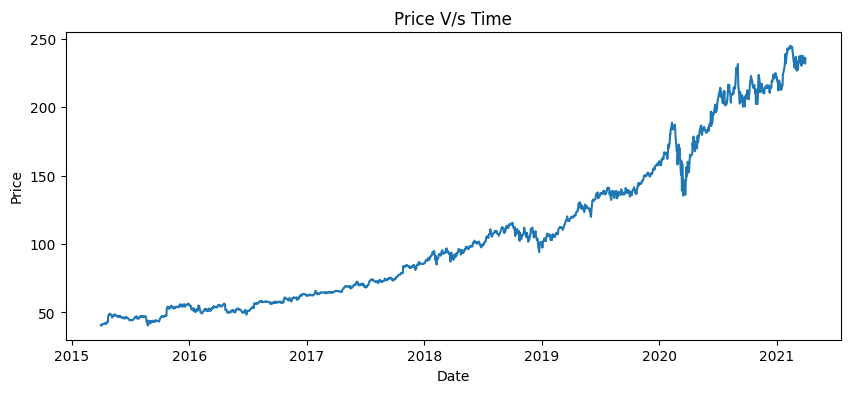

In [11]:
graph(stock, 'price', 'Date', 'Price',  'Price V/s Time')

# Seasonality

## BOXCOX TRANSFORM


used to remove variance

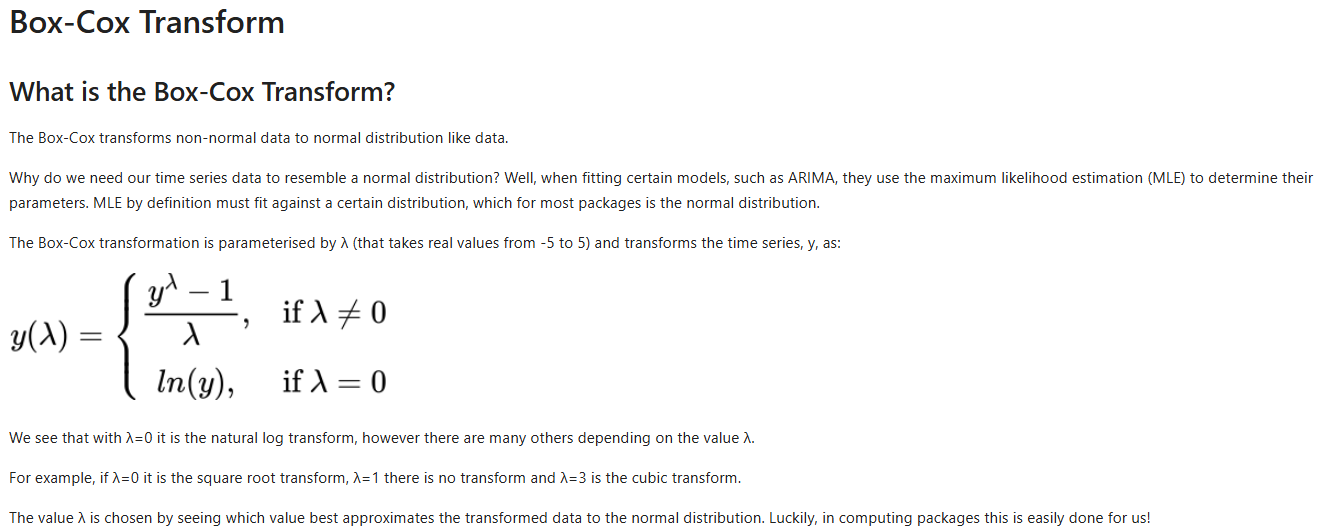

In [63]:
stock['prices_bc'], lam = boxcox(stock['price'])
stock['diff_boxcox'] = stock['prices_bc'].diff(1)
stock['diff_boxcox'] = stock['diff_boxcox'].shift(-1)

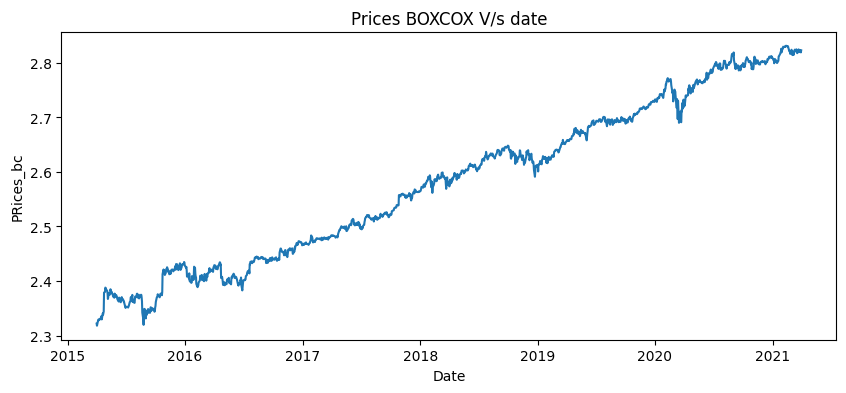

In [64]:
graph(stock, 'prices_bc', 'Date', 'PRices_bc', 'Prices BOXCOX V/s date')

## Log Returns

used to remove variance

In [66]:
stock['logret'] = np.log( stock['price']).diff()
stock['logret'] = stock['logret'].shift(-1)
#stock = stock.dropna(subset = ['logret'])

In [67]:
stock

,price,prices_bc,logret,diff_boxcox
date,,,,
2015-04-01,40.72,2.321878,-0.010616,-0.003827
2015-04-02,40.29,2.318052,0.030794,0.011070
2015-04-06,41.55,2.329121,-0.000481,-0.000172
2015-04-07,41.53,2.328949,-0.002652,-0.000950
2015-04-08,41.42,2.327999,0.001448,0.000518
...,...,...,...,...
2021-03-25,232.34,2.819700,0.017662,0.003924
2021-03-26,236.48,2.823624,-0.005257,-0.001166
2021-03-29,235.24,2.822458,-0.014516,-0.003228


## Periodgram

In [68]:
from scipy.signal import periodogram

In [69]:
stock

,price,prices_bc,logret,diff_boxcox
date,,,,
2015-04-01,40.72,2.321878,-0.010616,-0.003827
2015-04-02,40.29,2.318052,0.030794,0.011070
2015-04-06,41.55,2.329121,-0.000481,-0.000172
2015-04-07,41.53,2.328949,-0.002652,-0.000950
2015-04-08,41.42,2.327999,0.001448,0.000518
...,...,...,...,...
2021-03-25,232.34,2.819700,0.017662,0.003924
2021-03-26,236.48,2.823624,-0.005257,-0.001166
2021-03-29,235.24,2.822458,-0.014516,-0.003228


### for boxcox

In [70]:
freq, pow = periodogram( stock.prices_bc, scaling = 'density', detrend = 'constant')

In [71]:
periods = np.array([])
power = np.array([])
mask = freq != 0
periods = np.append(periods, 1/freq[mask])
power = np.append(power, pow[mask])

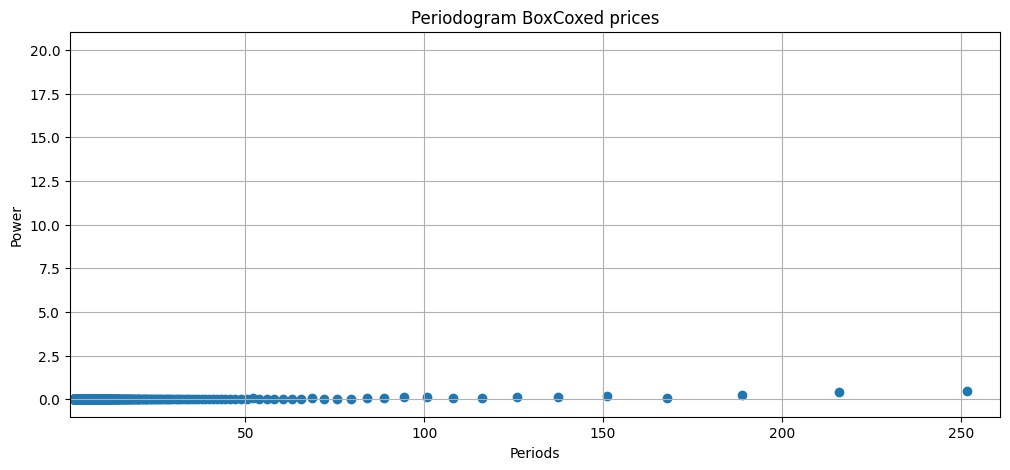

In [72]:
plt.figure(figsize = (12,5))
plt.scatter(periods, power)
plt.xlim(1, 261) # realistic trading cycles (bussiness days in a year)
plt.xlabel('Periods')
plt.ylabel('Power')
plt.title('Periodogram BoxCoxed prices')
plt.grid(True)
plt.show()

### For logret

In [73]:
freq, pow = periodogram( stock.prices_bc, scaling = 'density', detrend = 'constant')

In [74]:
periods = np.array([])
power = np.array([])
mask = freq != 0
periods = np.append(periods, 1/freq[mask])
power = np.append(power, pow[mask])

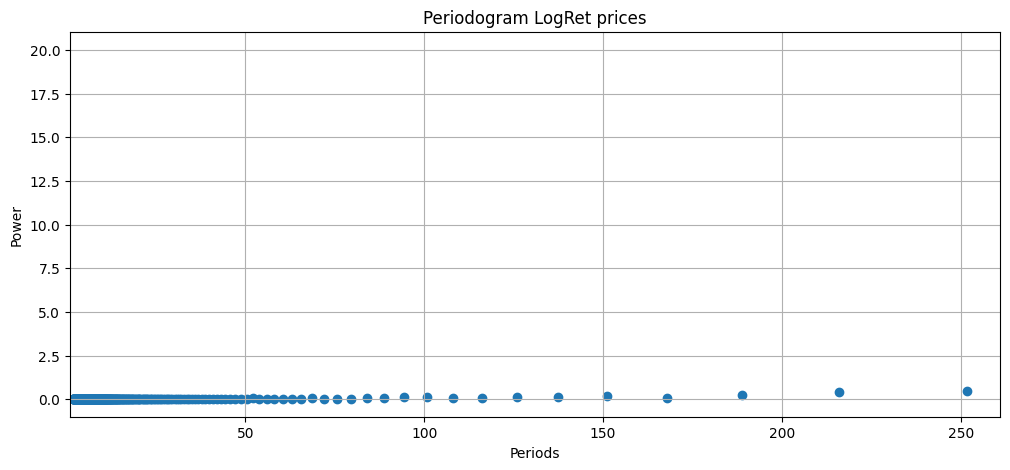

In [75]:
plt.figure(figsize = (12,5))
plt.scatter(periods, power)
plt.xlim(1, 261) # realistic trading cycles (bussiness days in a year)
plt.xlabel('Periods')
plt.ylabel('Power')
plt.title('Periodogram LogRet prices')
plt.grid(True)
plt.show()

NO SEASONALITY

# Auto Arima

In [83]:
pip install pmdarima

## TTS

In [84]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split #splitting time series

In [85]:
tr, te = train_test_split(stock, train_size=0.8)
tr, val = train_test_split(tr, train_size=0.8)

In [86]:
tr

,price,prices_bc,logret,diff_boxcox
date,,,,
2015-04-01,40.72,2.321878,-0.010616,-0.003827
2015-04-02,40.29,2.318052,0.030794,0.011070
2015-04-06,41.55,2.329121,-0.000481,-0.000172
2015-04-07,41.53,2.328949,-0.002652,-0.000950
2015-04-08,41.42,2.327999,0.001448,0.000518
...,...,...,...,...
2019-01-25,107.17,2.627608,-0.019694,-0.005444
2019-01-28,105.08,2.622164,-0.020576,-0.005719
2019-01-29,102.94,2.616445,0.032871,0.009121


In [87]:
def log_rets_to_price(last_price, log_return_predictions):
    """
    Converts a sequence of predicted log returns back into absolute price levels.

    Parameters:
    last_price (float): The actual closing price of the day before the forecast starts.
    log_return_predictions (array-like): The output from your AutoARIMA model.

    Returns:
    pd.Series: A series of predicted prices.
    """
    # 1. Calculate the cumulative sum of the log returns
    # This represents the total growth over time
    cumulative_log_returns = np.cumsum(log_return_predictions)

    # 2. Use the exponential function to get the growth factor
    # and multiply by the starting price
    predicted_prices = last_price * np.exp(cumulative_log_returns)

    return predicted_prices

In [88]:
tr.logret[1:].isna().sum()

np.int64(0)

In [89]:
combined_series = pd.concat([tr.logret[1:], val.logret], axis=0)
combined_series.isna().sum()

np.int64(0)

In [90]:
model_logret = pm.auto_arima(combined_series,
                      seasonal = False, # Turn off seasonality as recommended for stock data
                      # m =5,
                      d = None,
                      test = 'adf',
                      start_p = 0,
                      start_q = 0,
                      max_p = 5,       # Reduced max_p as suggested
                      max_q = 5,       # Reduced max_q as suggested
                      stepwise=True,
                      suppress_warnings=True,
                      error_action="ignore",
                      n_jobs=-1        # Enable parallel processing
                      )

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


In [91]:
model_logret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1207
Model:               SARIMAX(1, 0, 1)   Log Likelihood                3413.231
Date:                Sat, 07 Feb 2026   AIC                          -6818.463
Time:                        11:55:45   BIC                          -6798.079
Sample:                             0   HQIC                         -6810.787
                               - 1207                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      2.331      0.020    5.03e-05       0.001
ar.L1          0.7248      0.090      8.074      0.000       0.549       0.901
ma.L1         -0.8076      0.079    -10.214      0.000      -0.963      -0.653
sigma2         0.0002   4.17e-06     49.019      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):              1913.15
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.20
Prob(H) (two-sided):                  0.03   Kurtosis:                         9.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
forecast = model_logret.predict(n_periods=len(te))
forecasted_price = log_rets_to_price(val['price'][-1], forecast)
forecasted_price.index = te.index

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/tmp/ipython-input-3325319806.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasted_price = log_rets_to_price(val['price'][-1], forecast)


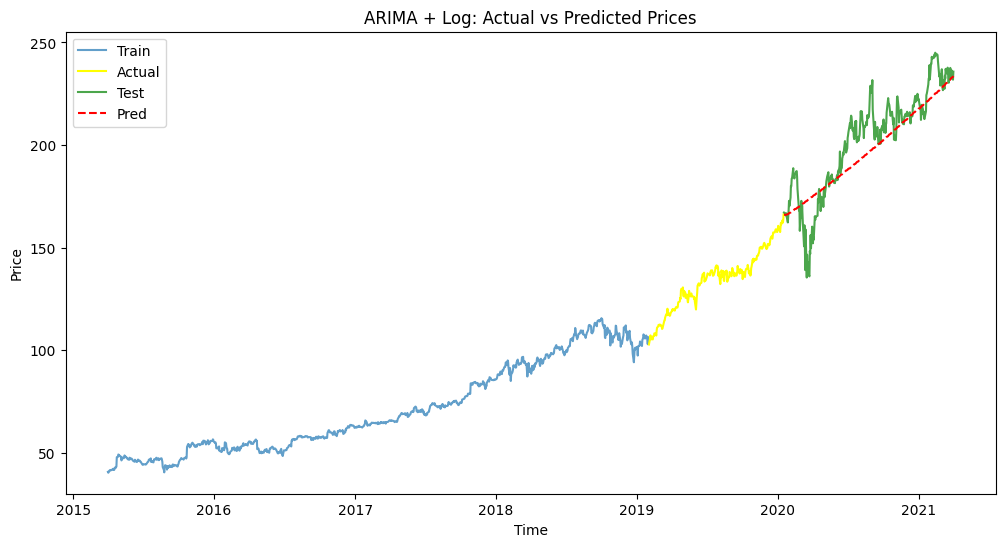

In [93]:
plt.figure(figsize=(12,6))

plt.plot(tr.price, label="Train", alpha=0.7)
plt.plot(val.price, label="Actual", color="yellow")
plt.plot(te.price, label="Test", alpha=0.7, color = 'green')
plt.plot(forecasted_price, label="Pred", linestyle="--", color='red')

plt.legend()
plt.title("ARIMA + Log: Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

date
2020-01-17    167.10
2020-01-21    166.50
2020-01-22    165.70
2020-01-23    166.72
2020-01-24    165.04
               ...  
2021-03-25    232.34
2021-03-26    236.48
2021-03-29    235.24
2021-03-30    231.85
2021-03-31    235.77
Name: price, Length: 303, dtype: float64 date
2020-01-17   -1.078408
2020-01-21   -0.533464
2020-01-22    0.279078
2020-01-23   -0.679372
2020-01-24    1.097744
                ...   
2021-03-25    0.174817
2021-03-26   -3.698016
2021-03-29   -2.190542
2021-03-30    1.467240
2021-03-31   -2.184671
Length: 303, dtype: float64
MAE:  9.478619932407998
ME:  -4.628045050910517
RSME:  12.522675168263723


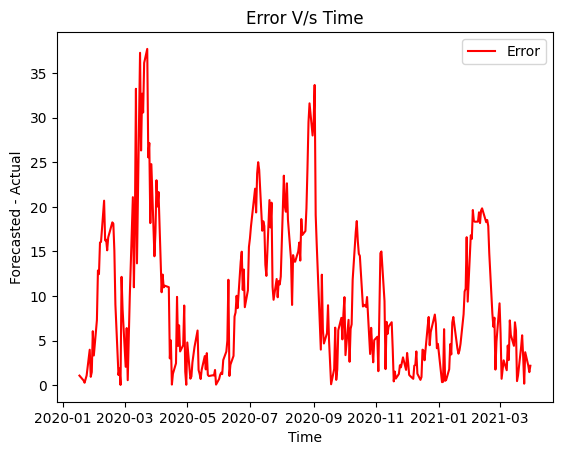

In [94]:
errors = forecasted_price - te.price
print(te.price, errors)
plt.plot(abs(errors), label="Error", color='red')
print("MAE: ",sum(abs(errors))/len(abs(errors)))
print("ME: ",sum(errors)/len(errors))
print("RSME: ", np.sqrt(sum(errors**2)/len(errors)))
plt.legend()
plt.title("Error V/s Time")
plt.xlabel("Time")
plt.ylabel("Forecasted - Actual")
plt.show()

## Beyond this is PURELY EXPERIMENTAL dont go ahead

# Decomposition

In [43]:
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

In [44]:
tr

,price,prices_bc,logret
date,,,
2015-04-01,40.72,2.321878,NaN
2015-04-02,40.29,2.318052,-0.010616
2015-04-06,41.55,2.329121,0.030794
2015-04-07,41.53,2.328949,-0.000481
2015-04-08,41.42,2.327999,-0.002652
...,...,...,...
2019-01-25,107.17,2.627608,0.009092
2019-01-28,105.08,2.622164,-0.019694
2019-01-29,102.94,2.616445,-0.020576


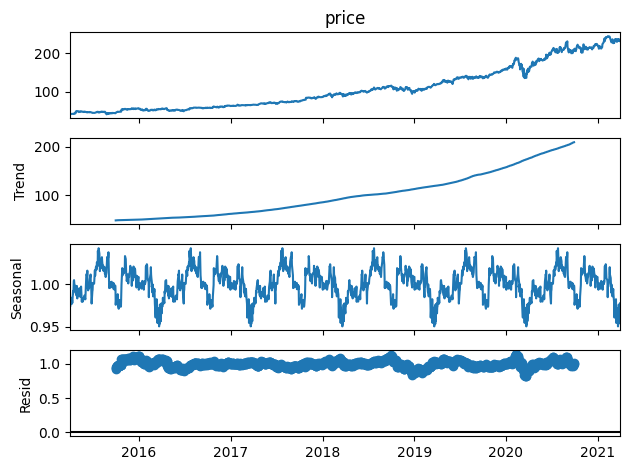

In [45]:
# Plot the decomposition for multiplicative series
decomposition_plot_multi = seasonal_decompose(stock['price'],
                                              model='multiplicative',
                                              period=252)
decomposition_plot_multi.plot()
plt.show()

## sarimax

In [46]:
order = (2,0,2)
seasonal_order = (1,0,0,5)

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_arima = SARIMAX(stock.logret,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False).fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Re-initialize SARIMAX model with the training log returns (consistent with model_logret)
# This ensures the model is trained only on the training data.
model_arima_for_prediction = SARIMAX(tr.logret[1:],
                                     order=order,
                                     seasonal_order=seasonal_order,
                                     enforce_stationarity=False,
                                     enforce_invertibility=False)

# Fit the model to the training data
model_arima_fit = model_arima_for_prediction.fit(maxiter=200, method='nm') # disp=False to suppress convergence messages



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:748: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
# Predict using the fitted model for the length of the validation set
# The 'steps' argument predicts that many steps forward from the end of the training data.
forecast_2 = model_arima_fit.predict(steps=len(val))

# Convert log returns forecast back to prices
forecasted_price_2 = log_rets_to_price(tr['price'][-1], forecast_2)


/tmp/ipython-input-4157703899.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasted_price_2 = log_rets_to_price(tr['price'][-1], forecast_2)


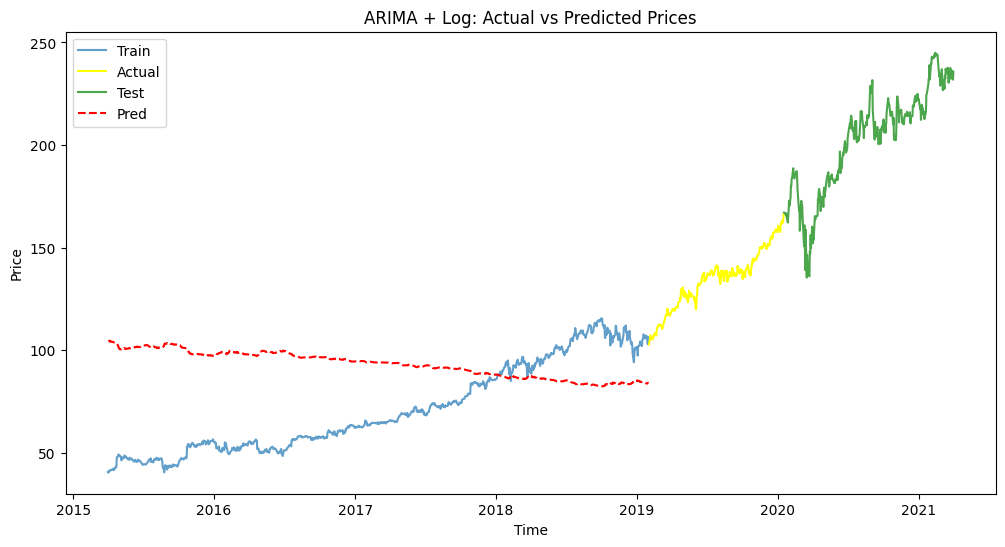

In [50]:
plt.figure(figsize=(12,6))

plt.plot(tr.price, label="Train", alpha=0.7)
plt.plot(val.price, label="Actual", color="yellow")
plt.plot(te.price, label="Test", alpha=0.7, color = 'green')
plt.plot(forecasted_price_2, label="Pred", linestyle="--", color='red')

plt.legend()
plt.title("ARIMA + Log: Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()